#RUN THIS CELL AND RESTART SESSION AND MOVE ON


In [ ]:
!pip install tensorflow
!pip install keras
!pip install tensorflow-hub
!pip install tensorflow-text
!pip install --upgrade tf_keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 91.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 34.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      S

#Prepping Each DF:
df1 -> df20 dataframes for each label with embedded vectors

In [ ]:
import csv
import json
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def convert_json_to_csv(json_files, csv_file):
    data = []
    for json_file in json_files:
        with open(json_file, 'r') as f:
            data.extend(json.load(f))

    with open(csv_file, 'w', newline='') as f:
        writer = csv.DictWriter(f, fieldnames=['id', 'labels', 'text'])
        writer.writeheader()
        for item in data:
            writer.writerow(item)

convert_json_to_csv(['Training Set Task1.json', 'Test Set Task1.json'], 'output.csv')
df = pd.read_csv('output.csv')

In [ ]:
df

,id,labels,text
0,128,['Black-and-white Fallacy/Dictatorship'],THERE ARE ONLY TWO GENDERS\n\nFEMALE \n\nMALE\n
1,189,[],This is not an accident!
2,96,"['Loaded Language', 'Name calling/Labeling', '...",SO BERNIE BROS HAVEN'T COMMITTED VIOLENCE EH?\...
3,154,"['Causal Oversimplification', 'Loaded Language...",PATHETIC\n\nThe Cowardly Asshole\nWeak Failure...
4,15,[],WHO TRUMP REPRESENTS\n\nWHO DEMOCRATS REPRESENT\n
...,...,...,...
883,761_batch_2,[],"Hi Joe, it's me...Cornpop\n"
884,762_batch_2,['Loaded Language'],HE'S MAKING HIS LIST\n\nHE'S CHECKING IT TWICE...
885,764_batch_2,"['Loaded Language', 'Smears']",PA WHAT'S IRONY MEAN?\n\nIRONY IS WHEN THE LIB...
886,768_batch_2,['Smears'],Girlfriend Keeps Referring To Herself As 'Wife...


In [ ]:
import pandas as pd

columns = [
    'text',
    'Appeal to authority',
    'Appeal to fear/prejudice',
    'Black-and-white Fallacy/Dictatorship',
    'Causal Oversimplification',
    'Doubt',
    'Exaggeration/Minimisation',
    'Flag-waving',
    'Glittering generalities (Virtue)',
    'Loaded Language',
    'Misrepresentation of Someone\'s Position (Straw Man)',
    'Name calling/Labeling',
    'Obfuscation, Intentional vagueness, Confusion',
    'Presenting Irrelevant Data (Red Herring)',
    'Reductio ad hitlerum',
    'Repetition',
    'Slogans',
    'Smears',
    'Thought-terminating cliché',
    'Whataboutism',
    'Bandwagon'
]

new_df = pd.DataFrame(columns=columns)
for index, row in df.iterrows():
    row_values = {'text': row['text']}
    for label in columns[1:]:
        if label in row['labels']:
            row_values[label] = 1
        else:
            row_values[label] = 0

    new_df.loc[len(new_df)] = row_values

final = pd.concat([df['text'], new_df.drop(columns=['text'])], axis=1)


In [ ]:
final

,text,Appeal to authority,Appeal to fear/prejudice,Black-and-white Fallacy/Dictatorship,Causal Oversimplification,Doubt,Exaggeration/Minimisation,Flag-waving,Glittering generalities (Virtue),Loaded Language,...,Name calling/Labeling,"Obfuscation, Intentional vagueness, Confusion",Presenting Irrelevant Data (Red Herring),Reductio ad hitlerum,Repetition,Slogans,Smears,Thought-terminating cliché,Whataboutism,Bandwagon
0,THERE ARE ONLY TWO GENDERS\n\nFEMALE \n\nMALE\n,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,This is not an accident!,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,SO BERNIE BROS HAVEN'T COMMITTED VIOLENCE EH?\...,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,1,0,0,0
3,PATHETIC\n\nThe Cowardly Asshole\nWeak Failure...,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,1,1,0,0,0
4,WHO TRUMP REPRESENTS\n\nWHO DEMOCRATS REPRESENT\n,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,"Hi Joe, it's me...Cornpop\n",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
884,HE'S MAKING HIS LIST\n\nHE'S CHECKING IT TWICE...,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
885,PA WHAT'S IRONY MEAN?\n\nIRONY IS WHEN THE LIB...,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
886,Girlfriend Keeps Referring To Herself As 'Wife...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


**TESTING STUFF**

In [ ]:
numCount = []
counter = 0
dfcount = final.drop(columns = ['text'], axis = 1)
dfcount



,Appeal to authority,Appeal to fear/prejudice,Black-and-white Fallacy/Dictatorship,Causal Oversimplification,Doubt,Exaggeration/Minimisation,Flag-waving,Glittering generalities (Virtue),Loaded Language,Misrepresentation of Someone's Position (Straw Man),Name calling/Labeling,"Obfuscation, Intentional vagueness, Confusion",Presenting Irrelevant Data (Red Herring),Reductio ad hitlerum,Repetition,Slogans,Smears,Thought-terminating cliché,Whataboutism,Bandwagon
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0
3,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
884,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
885,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
886,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
columns = [
    'text',
    'Appeal to authority',
    'Appeal to fear/prejudice',
    'Black-and-white Fallacy/Dictatorship',
    'Causal Oversimplification',
    'Doubt',
    'Exaggeration/Minimisation',
    'Flag-waving',
    'Glittering generalities (Virtue)',
    'Loaded Language',
    'Misrepresentation of Someone\'s Position (Straw Man)',
    'Name calling/Labeling',
    'Obfuscation, Intentional vagueness, Confusion',
    'Presenting Irrelevant Data (Red Herring)',
    'Reductio ad hitlerum',
    'Repetition',
    'Slogans',
    'Smears',
    'Thought-terminating cliché',
    'Whataboutism',
    'Bandwagon'
]

counter = 0
for label in dfcount:
  dflabel = dfcount[label]
  for index in dflabel:
    if index == 1:
      counter+=1
  numCount.append(counter)
  counter = 0
sum = 0
numCount
#numCount.remove(0)

labelCounts = pd.DataFrame(columns = columns)
labelCounts = labelCounts.drop(columns = ['text'], axis = 1)

labelCounts.loc[len(df.index)] = [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for label in labelCounts:
  labelCounts[label] = numCount[i]
  sum += numCount[i]
  i +=1
labelCounts['Total'] = sum
labelCounts


,Appeal to authority,Appeal to fear/prejudice,Black-and-white Fallacy/Dictatorship,Causal Oversimplification,Doubt,Exaggeration/Minimisation,Flag-waving,Glittering generalities (Virtue),Loaded Language,Misrepresentation of Someone's Position (Straw Man),...,"Obfuscation, Intentional vagueness, Confusion",Presenting Irrelevant Data (Red Herring),Reductio ad hitlerum,Repetition,Slogans,Smears,Thought-terminating cliché,Whataboutism,Bandwagon,Total
888,20,53,25,30,76,71,33,43,458,21,...,5,5,12,9,63,245,26,50,3,1519


In [ ]:
counter = 0
for label in dfcount:
  dflabel = dfcount[label]
  for index in dflabel:
    if index == 1:
      counter+=1
  numCount.append(counter)
  counter = 0
sum = 0
numCount

[20, 53, 25, 30, 76, 71, 33, 43, 458, 21, 271, 5, 5, 12, 9, 63, 245, 26, 50, 3]

In [ ]:
len(final)

888

In [ ]:
 len(final.iloc[0])

21

In [ ]:
df

,id,labels,text
0,128,['Black-and-white Fallacy/Dictatorship'],THERE ARE ONLY TWO GENDERS\n\nFEMALE \n\nMALE\n
1,189,[],This is not an accident!
2,96,"['Loaded Language', 'Name calling/Labeling', '...",SO BERNIE BROS HAVEN'T COMMITTED VIOLENCE EH?\...
3,154,"['Causal Oversimplification', 'Loaded Language...",PATHETIC\n\nThe Cowardly Asshole\nWeak Failure...
4,15,[],WHO TRUMP REPRESENTS\n\nWHO DEMOCRATS REPRESENT\n
...,...,...,...
883,761_batch_2,[],"Hi Joe, it's me...Cornpop\n"
884,762_batch_2,['Loaded Language'],HE'S MAKING HIS LIST\n\nHE'S CHECKING IT TWICE...
885,764_batch_2,"['Loaded Language', 'Smears']",PA WHAT'S IRONY MEAN?\n\nIRONY IS WHEN THE LIB...
886,768_batch_2,['Smears'],Girlfriend Keeps Referring To Herself As 'Wife...


In [ ]:
import tensorflow_hub as hub
import tensorflow_text as text

bert_preprocess = hub.KerasLayer('https://kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-preprocess/versions/3')
bert_encoder = hub.KerasLayer("https://www.kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/bert-en-uncased-l-12-h-768-a-12/versions/2")


In [ ]:

def get_sentence_embedding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

embedded_vectors = []
df_values = df.values
for i in range(len(df_values)):
  embedded_vector = get_sentence_embedding([df_values[i][2]])
  embedded_vectors.append(embedded_vector)

final['EMBEDDED'] = embedded_vectors





In [ ]:
def tensor_to_array(tensor):
    return tensor.numpy()

final['EMBEDDED'] = final['EMBEDDED'].apply(tensor_to_array)


In [ ]:
final

,text,Appeal to authority,Appeal to fear/prejudice,Black-and-white Fallacy/Dictatorship,Causal Oversimplification,Doubt,Exaggeration/Minimisation,Flag-waving,Glittering generalities (Virtue),Loaded Language,...,"Obfuscation, Intentional vagueness, Confusion",Presenting Irrelevant Data (Red Herring),Reductio ad hitlerum,Repetition,Slogans,Smears,Thought-terminating cliché,Whataboutism,Bandwagon,EMBEDDED
0,THERE ARE ONLY TWO GENDERS\n\nFEMALE \n\nMALE\n,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[[0.14970367, 0.25667977, 0.9587975, -0.244396..."
1,This is not an accident!,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[[0.24682939, -0.11040212, 0.47714895, 0.0568,..."
2,SO BERNIE BROS HAVEN'T COMMITTED VIOLENCE EH?\...,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,"[[0.070438646, -0.036105458, 0.28117564, -0.22..."
3,PATHETIC\n\nThe Cowardly Asshole\nWeak Failure...,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,"[[-0.30976647, -0.48666018, 0.9251401, -0.3942..."
4,WHO TRUMP REPRESENTS\n\nWHO DEMOCRATS REPRESENT\n,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[[-0.77070636, -0.40532288, 0.5220326, -0.3837..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,"Hi Joe, it's me...Cornpop\n",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[[0.19133131, -0.31989846, 0.9111919, 0.157832..."
884,HE'S MAKING HIS LIST\n\nHE'S CHECKING IT TWICE...,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,"[[0.14729768, 0.023011748, 0.8338483, 0.068766..."
885,PA WHAT'S IRONY MEAN?\n\nIRONY IS WHEN THE LIB...,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,"[[0.008869894, -0.16919722, 0.5473662, -0.1036..."
886,Girlfriend Keeps Referring To Herself As 'Wife...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,"[[-0.1869772, -0.19212094, 0.8407458, -0.24771..."


In [ ]:
import pandas as pd
import numpy as np

embedded_df = pd.DataFrame()

for index, row in final.iterrows():
    embedded_row = pd.DataFrame([np.squeeze(row['EMBEDDED'])], columns=[f'embedded_{i}' for i in range(len(np.squeeze(row['EMBEDDED'])))])
    embedded_df = pd.concat([embedded_df, embedded_row], ignore_index=True)



In [ ]:
embedded_df

,embedded_0,embedded_1,embedded_2,embedded_3,embedded_4,embedded_5,embedded_6,embedded_7,embedded_8,embedded_9,...,embedded_758,embedded_759,embedded_760,embedded_761,embedded_762,embedded_763,embedded_764,embedded_765,embedded_766,embedded_767
0,0.149704,0.256680,0.958798,-0.244397,0.624578,1.000000,0.371007,0.989432,-0.022795,0.496993,...,0.005751,0.524394,-0.984009,0.767947,-0.965604,0.993490,-0.320190,-0.997247,0.377619,0.977751
1,0.246829,-0.110402,0.477149,0.056800,0.398513,-0.999694,0.376272,0.994264,-0.550625,-0.153810,...,0.239621,0.218153,0.817788,0.567758,-0.976520,0.704722,-0.540186,-0.997512,0.354678,0.986598
2,0.070439,-0.036105,0.281176,-0.220035,0.102555,-0.999927,0.134430,0.720149,0.179538,0.060212,...,0.072407,0.347697,0.816774,0.789217,-0.998490,0.254069,-0.061746,-0.929525,0.195994,0.964888
3,-0.309766,-0.486660,0.925140,-0.394211,0.336524,0.999506,0.698353,0.936533,-0.429057,0.465754,...,0.590199,0.727203,-0.478350,0.938078,-0.998594,0.757075,-0.243681,-0.939298,0.318704,0.938293
4,-0.770706,-0.405323,0.522033,-0.383746,0.783581,0.982011,0.572887,0.978153,-0.486055,0.518086,...,0.754980,0.716089,0.567435,-0.684303,-0.973491,0.885594,-0.279027,-0.868878,0.680283,0.996665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.191331,-0.319898,0.911192,0.157832,0.128612,-0.999325,-0.303284,0.968781,-0.123079,-0.389776,...,0.192108,-0.054603,0.736668,0.240327,-0.957161,0.995577,0.179647,-0.986651,0.349976,0.996721
884,0.147298,0.023012,0.833848,0.068767,-0.174173,0.169842,-0.135139,0.819486,0.184849,-0.270060,...,0.086578,0.087023,0.302840,0.879595,-0.998288,0.730043,0.125940,-0.958695,0.020481,0.998665
885,0.008870,-0.169197,0.547366,-0.103686,0.252008,-0.999972,0.078313,0.153089,-0.051049,0.064351,...,0.169080,0.295446,0.935926,0.985250,-0.985860,-0.352540,-0.423491,-0.858435,0.378421,0.987724
886,-0.186977,-0.192121,0.840746,-0.247712,0.472968,0.359754,0.002967,0.965448,-0.503991,0.393950,...,0.438983,0.469339,0.066547,0.691365,-0.942294,0.957818,0.038312,-0.724861,0.202478,0.975313


In [ ]:
final = final.drop('text', axis=1)

In [ ]:
final = final.drop('EMBEDDED', axis=1)


In [ ]:
len(embedded_df)

888

In [ ]:
import IPython.display

for i, column in enumerate(final.columns):
    new_df = pd.concat([final[column], embedded_df], axis=1)

    filename = f'df_{i + 1}.csv'
    new_df.to_csv(filename, index=False)

    IPython.display.FileLink(filename)

In [ ]:
combined_df = pd.concat([embedded_df, final], axis=1)
combined_df

,embedded_0,embedded_1,embedded_2,embedded_3,embedded_4,embedded_5,embedded_6,embedded_7,embedded_8,embedded_9,...,Name calling/Labeling,"Obfuscation, Intentional vagueness, Confusion",Presenting Irrelevant Data (Red Herring),Reductio ad hitlerum,Repetition,Slogans,Smears,Thought-terminating cliché,Whataboutism,Bandwagon
0,0.149704,0.256680,0.958798,-0.244397,0.624578,1.000000,0.371007,0.989432,-0.022795,0.496993,...,0,0,0,0,0,0,0,0,0,0
1,0.246829,-0.110402,0.477149,0.056800,0.398513,-0.999694,0.376272,0.994264,-0.550625,-0.153810,...,0,0,0,0,0,0,0,0,0,0
2,0.070439,-0.036105,0.281176,-0.220035,0.102555,-0.999927,0.134430,0.720149,0.179538,0.060212,...,1,0,0,0,0,1,1,0,0,0
3,-0.309766,-0.486660,0.925140,-0.394211,0.336524,0.999506,0.698353,0.936533,-0.429057,0.465754,...,1,0,0,0,0,1,1,0,0,0
4,-0.770706,-0.405323,0.522033,-0.383746,0.783581,0.982011,0.572887,0.978153,-0.486055,0.518086,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.191331,-0.319898,0.911192,0.157832,0.128612,-0.999325,-0.303284,0.968781,-0.123079,-0.389776,...,0,0,0,0,0,0,0,0,0,0
884,0.147298,0.023012,0.833848,0.068767,-0.174173,0.169842,-0.135139,0.819486,0.184849,-0.270060,...,0,0,0,0,0,0,0,0,0,0
885,0.008870,-0.169197,0.547366,-0.103686,0.252008,-0.999972,0.078313,0.153089,-0.051049,0.064351,...,0,0,0,0,0,0,1,0,0,0
886,-0.186977,-0.192121,0.840746,-0.247712,0.472968,0.359754,0.002967,0.965448,-0.503991,0.393950,...,0,0,0,0,0,0,1,0,0,0


#lol


In [ ]:
import pandas as pd

df1 = pd.read_csv('df_1.csv')

In [ ]:
df1

,Appeal to authority,embedded_0,embedded_1,embedded_2,embedded_3,embedded_4,embedded_5,embedded_6,embedded_7,embedded_8,...,embedded_758,embedded_759,embedded_760,embedded_761,embedded_762,embedded_763,embedded_764,embedded_765,embedded_766,embedded_767
0,0,0.149704,0.256680,0.958797,-0.244397,0.624578,1.000000,0.371007,0.989432,-0.022795,...,0.005751,0.524394,-0.984009,0.767947,-0.965604,0.993490,-0.320190,-0.997247,0.377619,0.977751
1,0,0.246829,-0.110402,0.477149,0.056800,0.398513,-0.999694,0.376272,0.994264,-0.550625,...,0.239621,0.218153,0.817788,0.567758,-0.976519,0.704722,-0.540186,-0.997512,0.354678,0.986598
2,0,0.070439,-0.036105,0.281175,-0.220035,0.102555,-0.999927,0.134430,0.720149,0.179537,...,0.072407,0.347697,0.816775,0.789217,-0.998490,0.254070,-0.061747,-0.929525,0.195994,0.964888
3,0,-0.309767,-0.486660,0.925140,-0.394212,0.336524,0.999506,0.698353,0.936533,-0.429057,...,0.590199,0.727204,-0.478351,0.938078,-0.998594,0.757074,-0.243681,-0.939298,0.318704,0.938293
4,0,-0.770707,-0.405323,0.522034,-0.383747,0.783581,0.982012,0.572887,0.978154,-0.486056,...,0.754980,0.716089,0.567433,-0.684303,-0.973491,0.885594,-0.279027,-0.868878,0.680283,0.996665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,0,-0.127832,-0.246085,-0.164782,-0.289564,0.424623,-0.999938,0.428815,0.952076,-0.378023,...,0.387769,0.378413,0.892239,0.090741,-0.974907,0.714188,-0.434720,-0.911015,0.537263,0.889535
684,0,-0.158919,-0.395939,0.973374,-0.209964,0.410214,0.999852,0.353385,0.886655,-0.440621,...,0.363994,0.378479,-0.695894,0.078331,-0.996300,0.993628,-0.091036,-0.928421,0.288610,0.993621
685,0,0.026221,-0.059365,0.811005,0.095692,0.016045,-0.999940,-0.145295,0.975194,-0.238413,...,0.386658,0.311632,0.959203,-0.331206,-0.985892,0.657176,-0.266518,-0.902692,0.377343,0.999155
686,0,0.094727,-0.080439,0.204104,-0.238429,0.342692,-0.999994,0.190839,0.833206,-0.549247,...,0.258006,0.164518,0.967986,-0.915275,0.041039,0.452181,-0.170250,-0.948184,0.561243,0.996495


# Label 1 : df1 Model "Appeal to Authority" - 99% Accuracy






In [ ]:
x = df1.drop('Appeal to authority', axis=1)
y = df1['Appeal to authority']

In [ ]:
df1

,Appeal to authority,embedded_0,embedded_1,embedded_2,embedded_3,embedded_4,embedded_5,embedded_6,embedded_7,embedded_8,...,embedded_758,embedded_759,embedded_760,embedded_761,embedded_762,embedded_763,embedded_764,embedded_765,embedded_766,embedded_767
0,0,0.149704,0.256680,0.958797,-0.244397,0.624578,1.000000,0.371007,0.989432,-0.022795,...,0.005751,0.524394,-0.984009,0.767947,-0.965604,0.993490,-0.320190,-0.997247,0.377619,0.977751
1,0,0.246829,-0.110402,0.477149,0.056800,0.398513,-0.999694,0.376272,0.994264,-0.550625,...,0.239621,0.218153,0.817788,0.567758,-0.976519,0.704722,-0.540186,-0.997512,0.354678,0.986598
2,0,0.070439,-0.036105,0.281175,-0.220035,0.102555,-0.999927,0.134430,0.720149,0.179537,...,0.072407,0.347697,0.816775,0.789217,-0.998490,0.254070,-0.061747,-0.929525,0.195994,0.964888
3,0,-0.309767,-0.486660,0.925140,-0.394212,0.336524,0.999506,0.698353,0.936533,-0.429057,...,0.590199,0.727204,-0.478351,0.938078,-0.998594,0.757074,-0.243681,-0.939298,0.318704,0.938293
4,0,-0.770707,-0.405323,0.522034,-0.383747,0.783581,0.982012,0.572887,0.978154,-0.486056,...,0.754980,0.716089,0.567433,-0.684303,-0.973491,0.885594,-0.279027,-0.868878,0.680283,0.996665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,0,-0.127832,-0.246085,-0.164782,-0.289564,0.424623,-0.999938,0.428815,0.952076,-0.378023,...,0.387769,0.378413,0.892239,0.090741,-0.974907,0.714188,-0.434720,-0.911015,0.537263,0.889535
684,0,-0.158919,-0.395939,0.973374,-0.209964,0.410214,0.999852,0.353385,0.886655,-0.440621,...,0.363994,0.378479,-0.695894,0.078331,-0.996300,0.993628,-0.091036,-0.928421,0.288610,0.993621
685,0,0.026221,-0.059365,0.811005,0.095692,0.016045,-0.999940,-0.145295,0.975194,-0.238413,...,0.386658,0.311632,0.959203,-0.331206,-0.985892,0.657176,-0.266518,-0.902692,0.377343,0.999155
686,0,0.094727,-0.080439,0.204104,-0.238429,0.342692,-0.999994,0.190839,0.833206,-0.549247,...,0.258006,0.164518,0.967986,-0.915275,0.041039,0.452181,-0.170250,-0.948184,0.561243,0.996495


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
683    0
684    0
685    0
686    0
687    0
Name: Appeal to authority, Length: 688, dtype: int64

In [ ]:
for i in range(2):
  print(sum(y == i))

675
13


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df1, test_size=0.3, random_state=42, stratify=df1["Appeal to authority"])  # Stratify based on the target column

x_train = train.drop("Appeal to authority", axis=1)
y_train = train["Appeal to authority"]

x_test = test.drop("Appeal to authority", axis=1)
y_test = test["Appeal to authority"]

In [ ]:
for i in range(2):
  print(sum(y_test == i))

203
4


In [ ]:
y_train

596    0
378    0
215    0
534    0
76     0
      ..
510    0
663    0
386    0
399    0
95     0
Name: Appeal to authority, Length: 481, dtype: int64

In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 4.7 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report
import numpy as np
import tensorflow_addons as tfa
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}
# Calculate class weights
total_samples = len(y_train)


# Define and compile the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with class weights
try:
    history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.2, class_weight=class_weights, verbose=0)
except KeyError as e:
    print(f"KeyError: {e}")

# Predict on the test set
y_pred = model.predict(x_test)
y_pred = np.round(y_pred).flatten()

# Print the classification report
print(classification_report(y_test, y_pred))


7/7 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       203
           1       0.27      0.75      0.40         4

    accuracy                           0.96       207
   macro avg       0.63      0.86      0.69       207
weighted avg       0.98      0.96      0.97       207



In [ ]:
import matplotlib.pyplot as plt
def plot_loss(history):
  plt.plot(history.history['loss'], label = 'loss')
  plt.plot(history.history['val_loss'], label = 'val_loss'),
  plt.xlabel('Epoch')
  plt.ylabel("SparseCategoricalCrossentropy")
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label = 'accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel("Accuracy")
  plt.legend()
  plt.grid(True)
  plt.show()

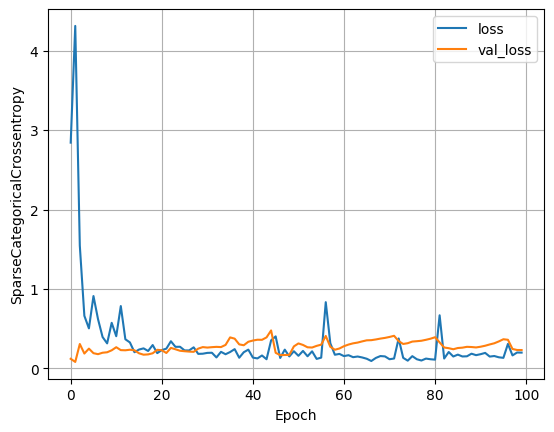

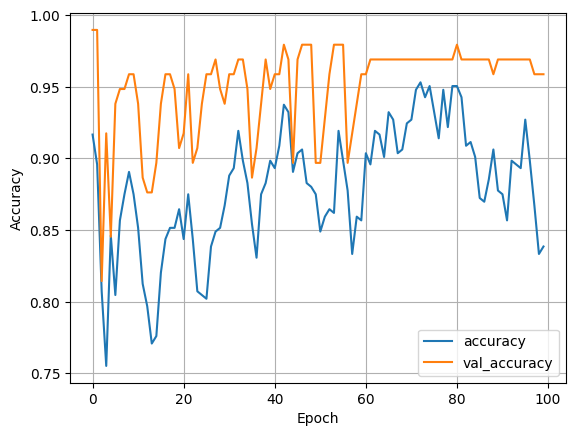

In [ ]:
plot_loss(history)
plot_accuracy(history)

In [ ]:
from sklearn.naive_bayes import GaussianNB
n_bayes = GaussianNB()
n_bayes = n_bayes.fit(x_train.values, y_train.values)
y_pred = n_bayes.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       203
           1       0.33      0.50      0.40         4

    accuracy                           0.97       207
   macro avg       0.66      0.74      0.69       207
weighted avg       0.98      0.97      0.97       207



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


# Label 2 : df2 Model "Appeal to fear/prejudice" - 97% Accuracy






In [ ]:
from imblearn.over_sampling import RandomOverSampler
x_2 = df2.drop('Appeal to fear/prejudice', axis=1)
y_2 = df2['Appeal to fear/prejudice']

In [ ]:
def normalizer(x, y, oversampler = False):
  if oversampler:
    over = RandomOverSampler()
    x, y = over.fit_resample(x, y)

  data = np.hstack((x, np.reshape(y, (-1, 1))))

  return data, x, y

In [ ]:
data2, x_2, y_2 = normalizer(x_2,y_2, oversampler = True)

In [ ]:
from sklearn.model_selection import train_test_split

data2 = pd.DataFrame(data2)
train2, test2 = train_test_split(data2, test_size=0.2, random_state=42, stratify=data2[768])  # Stratify based on the target column

x_train2 = train2.drop(768, axis=1)
y_train2 = train2[768]

x_test2 = test2.drop(768, axis=1)
y_test2 = test2[768]

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report
import numpy as np

# Assuming x_train, y_train, x_test, and y_test are already defined

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history2 = model.fit(x_train2, y_train2, batch_size=32, epochs=250, validation_split=0.2, verbose=0)

y_pred2 = model.predict(x_test2)
y_pred2 = np.round(y_pred2).flatten()

print(classification_report(y_test2, y_pred2))


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97       129
         1.0       0.94      1.00      0.97       129

    accuracy                           0.97       258
   macro avg       0.97      0.97      0.97       258
weighted avg       0.97      0.97      0.97       258



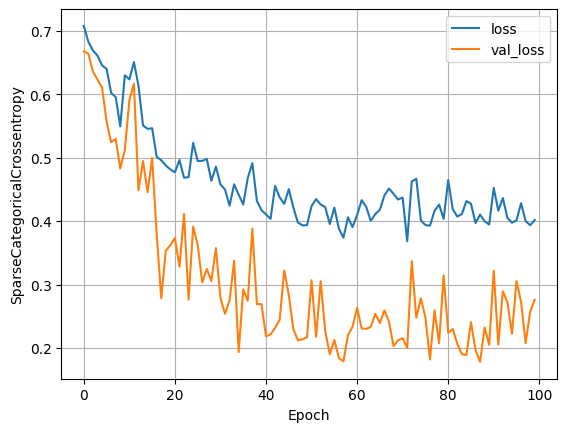

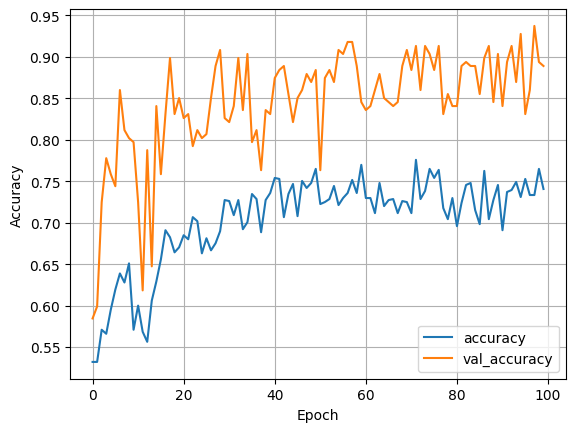

In [ ]:
plot_loss(history)
plot_accuracy(history)

In [ ]:
import matplotlib.pyplot as plt
def plot_loss(history):
  plt.plot(history.history['loss'], label = 'loss')
  plt.plot(history.history['val_loss'], label = 'val_loss'),
  plt.xlabel('Epoch')
  plt.ylabel("SparseCategoricalCrossentropy")
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label = 'accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel("Accuracy")
  plt.legend()
  plt.grid(True)
  plt.show()

#Multi-label


In [ ]:
from sklearn.model_selection import train_test_split

y_dropper = final.columns
train_ml, test_ml = train_test_split(combined_df, test_size=0.3, random_state=42)  # Stratify based on the target column

x_train_ml = train_ml.drop(y_dropper, axis=1)
y_train_ml = train_ml[y_dropper]

x_test_ml = test_ml.drop(y_dropper, axis=1)
y_test_ml = test_ml[y_dropper]




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.0437 - label_accuracy: 0.5931 - loss: 7.0301 - val_accuracy: 0.0412 - val_label_accuracy: 0.7860 - val_loss: 0.5239
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0269 - label_accuracy: 0.7097 - loss: 5.8606 - val_accuracy: 0.0375 - val_label_accuracy: 0.8242 - val_loss: 0.4230
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0556 - label_accuracy: 0.7876 - loss: 5.1136 - val_accuracy: 0.0449 - val_label_accuracy: 0.9119 - val_loss: 0.3386
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0770 - label_accuracy: 0.8338 - loss: 4.1106 - val_accuracy: 0.0412 - val_label_accuracy: 0.9126 - val_loss: 0.2955
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0812 - label_accuracy: 0.8661 - loss: 3.1930 - val_accuracy: 0.0524 - val_label_accuracy: 0.9126 - val_loss: 0.2841
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0739 - label_accuracy: 0.88

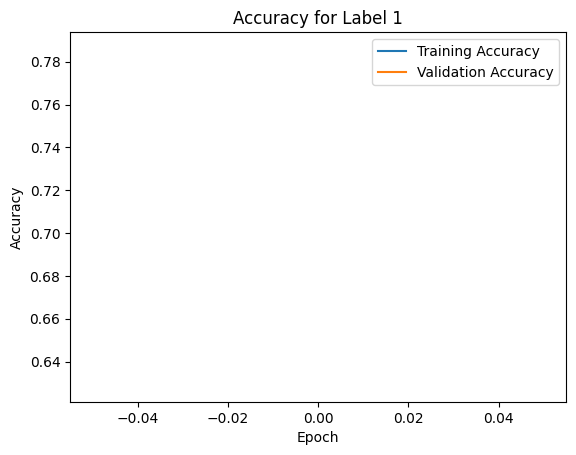

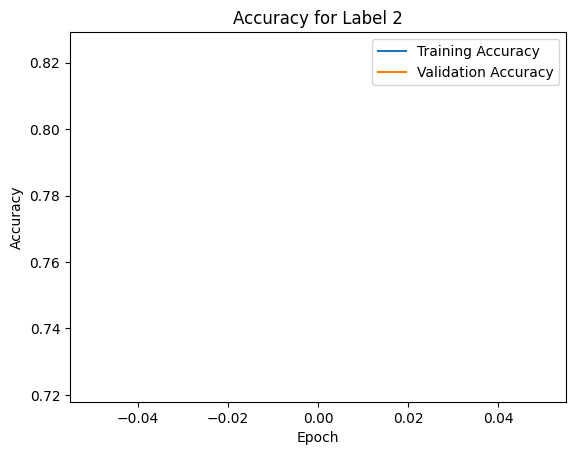

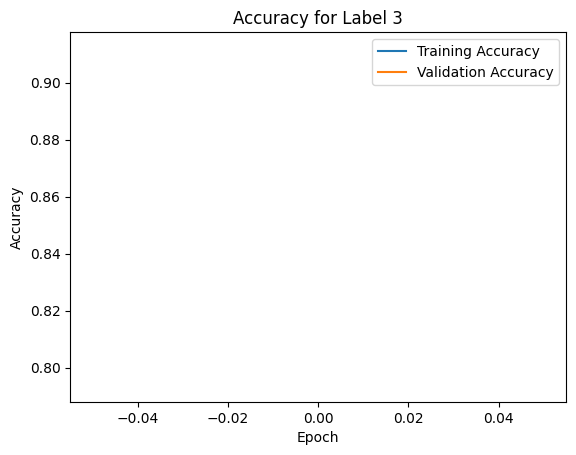

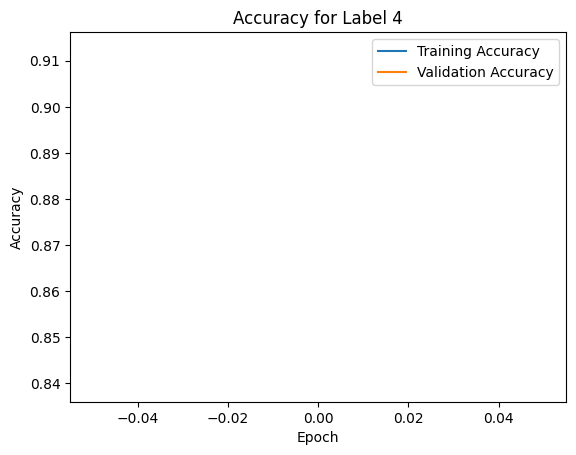

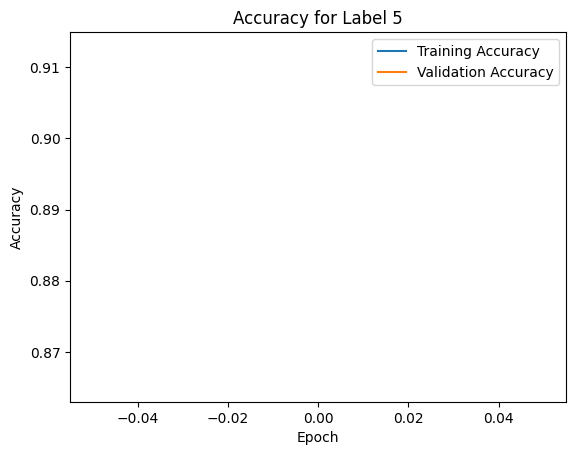

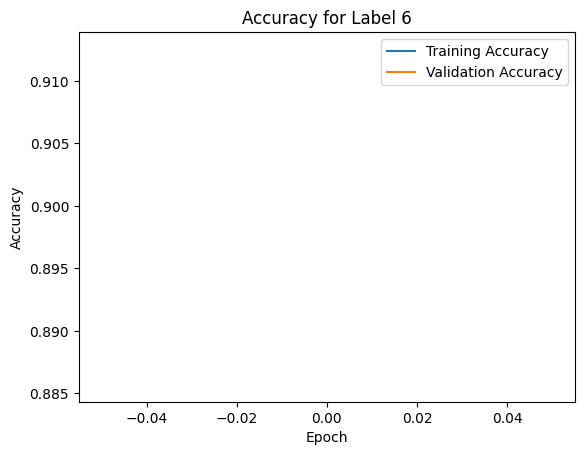

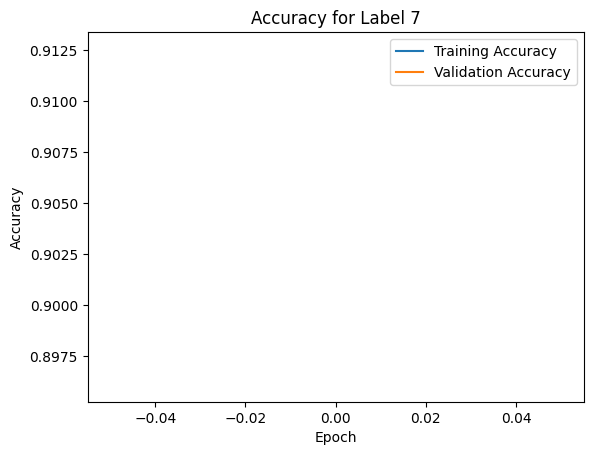

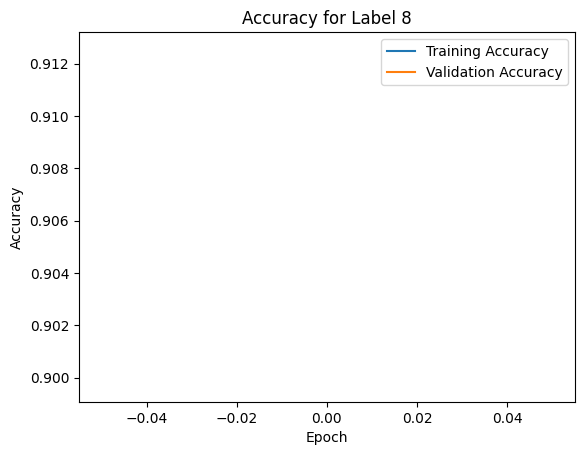

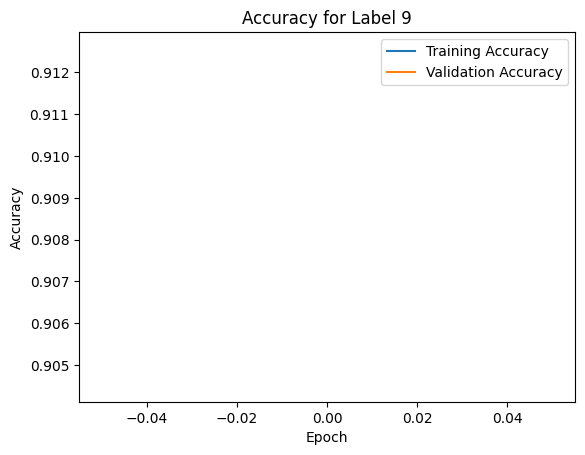

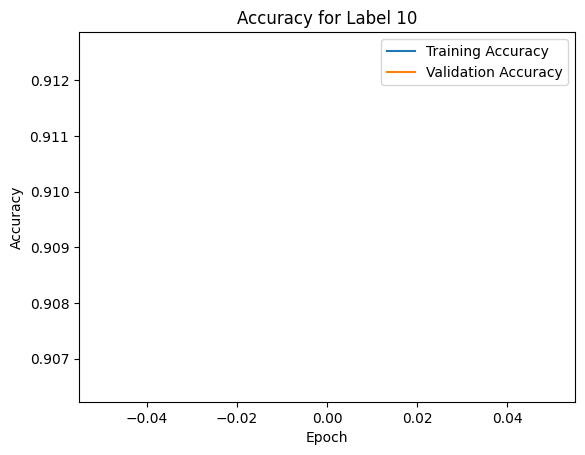

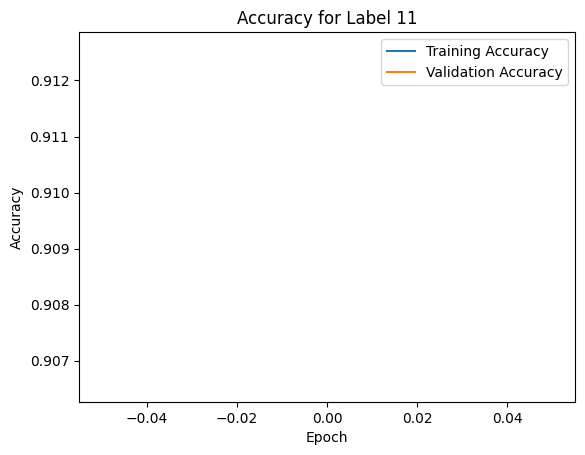

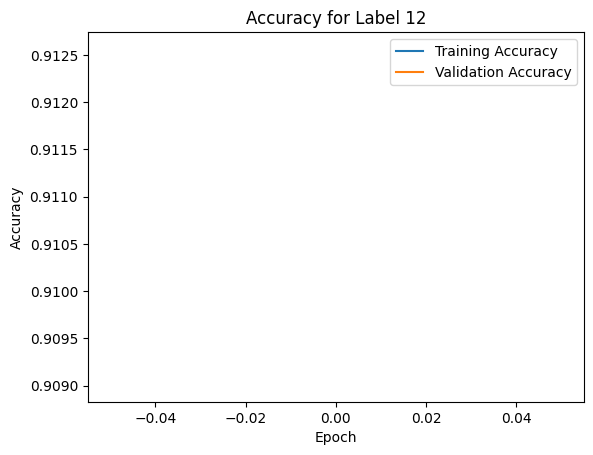

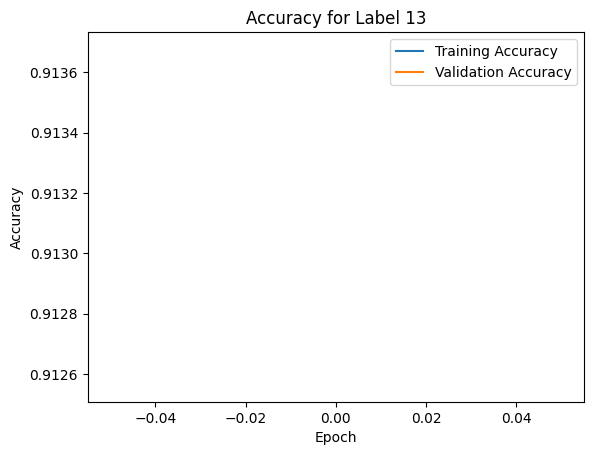

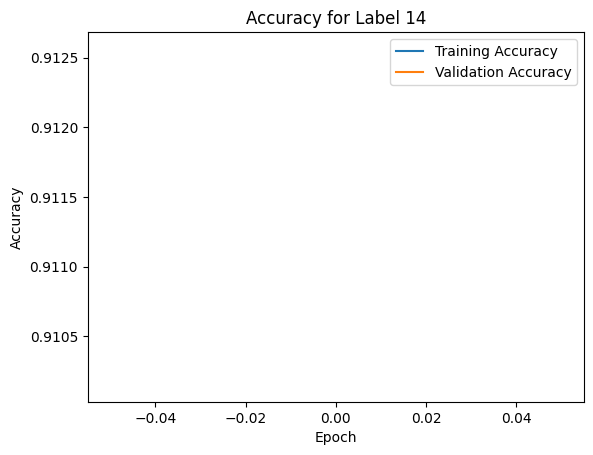

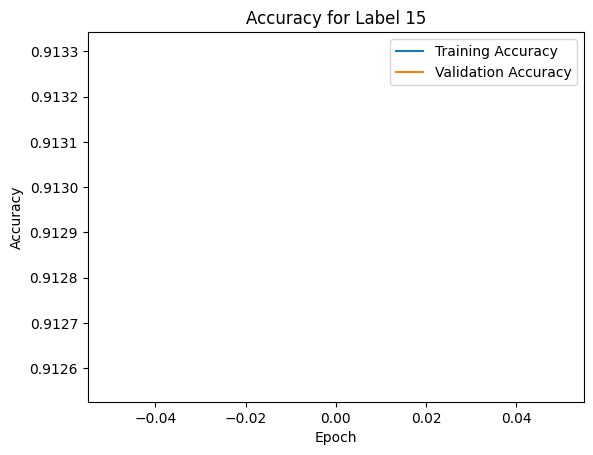

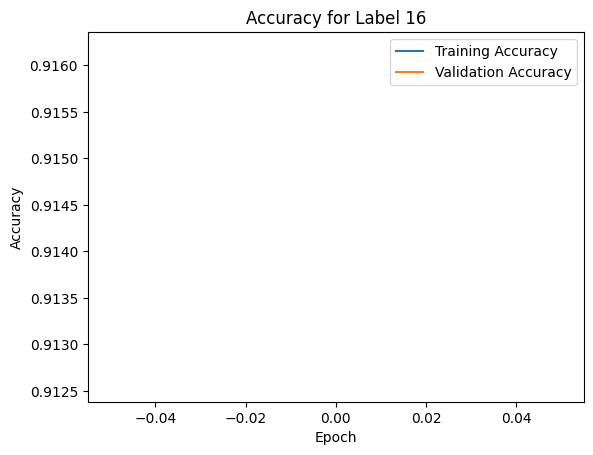

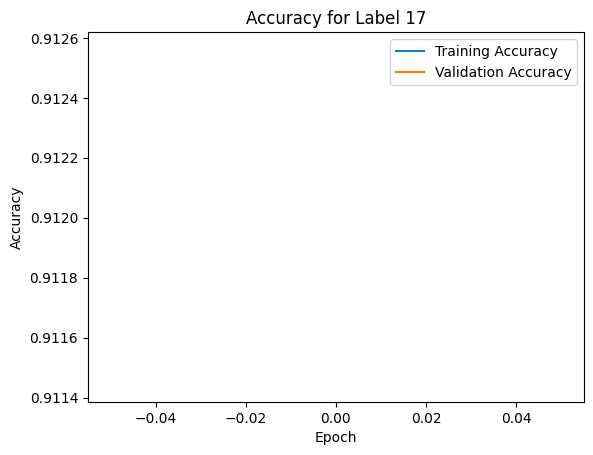

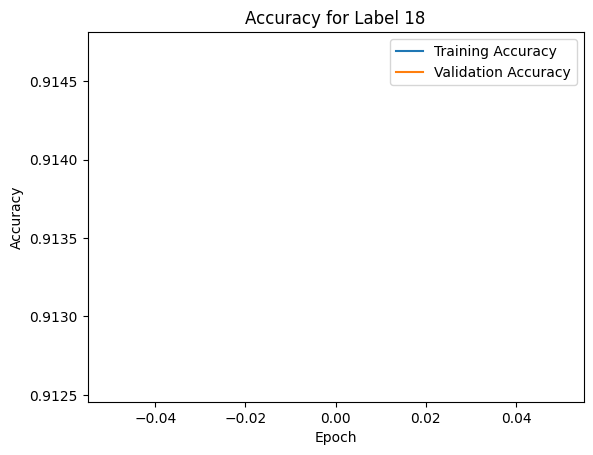

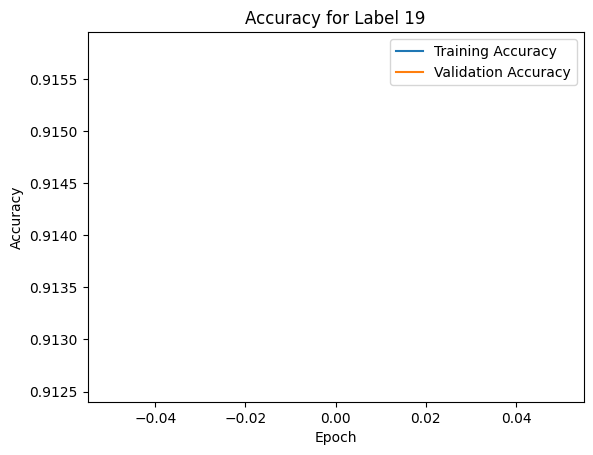

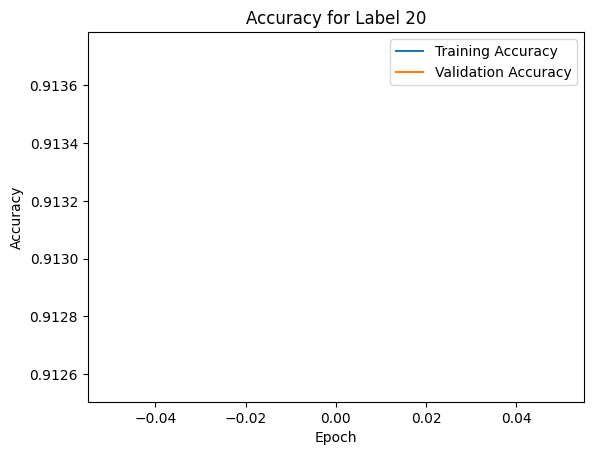

Label 1 classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       259
           1       0.50      0.62      0.56         8

    accuracy                           0.97       267
   macro avg       0.74      0.80      0.77       267
weighted avg       0.97      0.97      0.97       267

Label 2 classification report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       252
           1       0.50      0.13      0.21        15

    accuracy                           0.94       267
   macro avg       0.73      0.56      0.59       267
weighted avg       0.93      0.94      0.93       267

Label 3 classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       261
           1       0.00      0.00      0.00         6

    accuracy                           0.97       267
   macro avg       0.49      0.50  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       241
           1       0.14      0.04      0.06        26

    accuracy                           0.88       267
   macro avg       0.52      0.51      0.50       267
weighted avg       0.83      0.88      0.85       267

Label 17 classification report:
              precision    recall  f1-score   support

           0       0.84      0.68      0.75       196
           1       0.42      0.63      0.50        71

    accuracy                           0.67       267
   macro avg       0.63      0.66      0.63       267
weighted avg       0.72      0.67      0.68       267

Label 18 classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       259
           1       0.00      0.00      0.00         8

    accuracy                           0.97       267
   macro avg       0.49      0.50      0.49       267
weighted a

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report
import numpy as np
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt

def label_accuracy(y_true, y_pred):
    accuracies = []
    for i in range(y_true.shape[1]):
        true_values = y_true[:, i]
        pred_values = K.round(y_pred[:, i])
        pred_values = K.cast(pred_values, 'int64')  # Cast to integer type
        accuracy = K.mean(K.equal(true_values, pred_values), axis=-1)
        accuracies.append(accuracy)
    return accuracies
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train_ml.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(20, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', label_accuracy])

total_samples = len(y_train_ml)
class_counts = np.sum(y_train_ml, axis=0)
class_weights = {i: total_samples / (2 * class_counts[i]) for i in range(20)}

history = model.fit(x_train_ml, y_train_ml, batch_size=32, epochs=100,
                    validation_data=(x_test_ml, y_test_ml),
                    class_weight=class_weights, verbose=1)

y_pred_ml = model.predict(x_test_ml)
y_pred_ml = (y_pred_ml > 0.2).astype(int)
label_accuracies = history.history['label_accuracy']
val_label_accuracies = history.history['val_label_accuracy']

for i in range(20):
    plt.figure()
    plt.plot(label_accuracies[i], label='Training Accuracy')
    plt.plot(val_label_accuracies[i], label='Validation Accuracy')
    plt.title(f'Accuracy for Label {i+1}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
for i in range(20):
    print(f"Label {i+1} classification report:")
    print(classification_report(y_test_ml.iloc[:, i], y_pred_ml[:, i]))

In [ ]:
def label_accuracy(y_true, y_pred):
    accuracies = []
    for i in range(y_true.shape[1]):
        true_values = y_true[:, i]
        pred_values = K.round(y_pred[:, i])
        accuracy = K.mean(K.equal(true_values, pred_values))
        accuracies.append(accuracy)
    return accuracies